## Objetivo del Data-Cleaning

#### A partir del dataset aportado, la idea es limpiar los datos de forma que se puedan extraer información relevante. He partido de las siguientes hipótesis que servirán como guía para decidir el tipo de limpieza de datos.


- El país donde más gente ha muerto por tiburones es USA.

- El número de muertes por ataque de tiburones es mayor en los casos en los que hay intervención o injerencia humana.

- La actividad más relacionada con ataque de tiburones es el surf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import re

In [2]:
sharkAttack = pd.read_csv('../your-code/dataset_origin.csv', engine='python')

###### Como quiero analizar los países voy a comenzar viendo los valores que tengo, si hay nulos, cuántos y determinar si cuento con ellos para el análisis o no.

In [3]:
sharkAttack['Country'].value_counts().head()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
Name: Country, dtype: int64

In [4]:
sharkAttack[(sharkAttack["Location"].isnull() == True)].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
21,2016.07.28.R,28-Jul-16,2016,Unprovoked,CHINA,Hong Kong,NaN,Swimming,Justus Franz,M,...,NaN,"Klassick, 7/28/2016",2016.07.28.R-Franz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.28.R,2016.07.28.R,5972,NaN,NaN
42,2016.06.24,24-Jun-16,2016,Unprovoked,COLUMBIA,Isla Provedencia,NaN,Scuba Diving,Arturo Velez,M,...,"Caribbean reef shark, 4.5'",Dr. A. Velez,2016.06.24-Velez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.06.24,2016.06.24,5951,NaN,NaN
73,2016.04.08,08-Apr-16,2016,Invalid,CAPE VERDE,Boa Vista Island,NaN,NaN,a British citizen,M,...,Shark involvement not confirmed,L.O.Guttke,2016.04.08-CapeVerde.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.08,2016.04.08,5920,NaN,NaN
80,2016.03.26,26-Mar-16,2016,Provoked,BAHAMAS,NaN,NaN,NaN,Henry Kreckman,M,...,"Nurse shark, 2.5-ft","Wisconsin State Journal, 4/2/2016",2016.03.26-Kreckman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.26,2016.03.26,5913,NaN,NaN
83,2016.03.10,10-Mar-16,2016,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,...,NaN,"Fiji Sun, 3/12/2016",2016.03.10-Tabua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.10,2016.03.10,5910,NaN,NaN


In [5]:
sharkAttack[(sharkAttack["Unnamed: 23"].isnull() == True)].head()
sharkAttack[(sharkAttack["Unnamed: 22"].isnull() == True)].head()

#Voy a comprobar los valores de esta columna porque no creo que me sirvan para el análisis.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [6]:
casNumber1 = sharkAttack[(sharkAttack["Case Number.1"].isnull() == True)]
casNumber1.shape
x = sharkAttack["Case Number.1"]== sharkAttack["Case Number"] 
#Aquí compruebo que ambas columnas contienen en la mayor parte de los casos los mismos valores.
x.value_counts()

True     5979
False      13
dtype: int64

##### Las fechas están muy mal organizadas en el dataset. Voy a unificarlas a partir de la columna 'Case Number' para tener limpio el mes

In [7]:
def replaceString(e):
    e=str(e)
    e = re.findall('\d\d\d\.(\d\d).', e)
    if e ==[]:
        return 0
    return e[0]

In [8]:
sharkAttack['Case Number'] = sharkAttack['Case Number'].apply(replaceString)

In [9]:
sharkAttack = sharkAttack[(sharkAttack['Case Number']!='00') & (sharkAttack['Case Number']!=0)]

In [10]:
sharkAttack = sharkAttack.rename(index=str, columns={"Case Number": "Month"})

#### He decidido analizar los últimos 60 años porque puede quedar descompensado si tengo en cuenta fechas anteriores.  En muchos casos no se tiene la información suficiente para comprobar la localización o el tipo de actividad.

In [11]:
sharkAttack_1956 = sharkAttack[(sharkAttack['Year']<1956)] #Aquí compruebo el dataset con los valores anteriores a 1956.
sharkAttack_1956.head()

,Month,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4047,12,Reported 31-Dec-1955,1955,Boating,AUSTRALIA,Tasmania,NaN,Ocean racing,yacht Even,NaN,...,NaN,"C. Black, GSAF",1955.12.31.R-Even.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.12.31,1955.12.31,1946,NaN,NaN
4048,12,11-Dec-55,1955,Boating,USA,Florida,� mile offshore & 9 miles north of Fort Pierce,Fishing for pompano,"boat, occupants: P.D. Neilly & Charlton Anderson",NaN,...,NaN,"R.F. Hutton, 3/30/1959, citing Miami Herald; T...",1955.12.11-boat Neilly_Charlton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.12.11,1955.12.11,1945,NaN,NaN
4049,11,16-Nov-55,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,...,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,1944,NaN,NaN
4050,11,Nov-55,1955,Unprovoked,PAPUA NEW GUINEA,"Admiralty Islands, Manus Province","Low Island, Manus",Spearfishing,male,M,...,NaN,"Rapson, p.149",1955.11.00-LowIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.00,1955.11.00,1943,NaN,NaN
4051,10,16-Oct-55,1955,Provoked,AUSTRALIA,Queensland,"Tully, North Queensland",Spearfishing & lassoed shark,Noel Cross,M,...,6' shark,"Sydney Morning Herald, 10/17/1955;V.M. Copples...",1955.10.16-Cross.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.10.16,1955.10.16,1942,NaN,NaN


In [12]:
sharkAttack = sharkAttack[(sharkAttack['Year']>=1956)] 
sharkAttack.head()

,Month,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,09,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,09,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,09,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,09,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,09,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [13]:
sharkAttack['Type'].value_counts()

Unprovoked      2938
Provoked         374
Invalid          327
Boat             184
Sea Disaster      84
Boating            3
Name: Type, dtype: int64

In [14]:
sharkAttack = sharkAttack.replace(to_replace='Boating', value='Boat', regex=True) 

#He detectado que en la actividad Boat y Boating están por separado

#### Como me interesan los países con mayores ataques de tiburones, voy a seleccionar los que hayan tenido desde 1956  hasta 2016 al menos 10 ataques.

In [15]:
sharkAttack ['Country'].value_counts().head()

USA             1698
AUSTRALIA        682
SOUTH AFRICA     431
BRAZIL            95
BAHAMAS           82
Name: Country, dtype: int64

In [16]:
sharkAttack = sharkAttack[sharkAttack['Country'].isin(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'RAZIL','BAHAMAS','NEW ZEALAND', 'PAPUA NEW GUINEA', 'MEXICO', 'REUNION','NEW CALEDONIA','MOZAMBIQUE','FIJI ITALY','PHILIPPINES', 'EGYPT', 'JAPAN', 'HONG KONG','FRENCH', 'POLYNESIA', 'SPAIN','SOLOMON ISLANDS', 'PANAMA', 'VIETNAM'])]

#### Voy a hacer lo mismo con 'Area' y no tendré en cuenta la localización exacta. Para 'Area' voy a seleccionar las ciudades/estados en los que se hayan producido al menos 5 ataques.

In [17]:
count_area = sharkAttack['Area'].value_counts()
count_list = count_area[count_area >= 5].index.tolist()
sharkAttack = sharkAttack[sharkAttack['Area'].isin(count_list)]

In [18]:
def newString(e):
    e=str(e)
    if (re.search('California', e)):
        return 'California'
    if (re.search('Florida', e)):
        return 'Florida'
    if (re.search('Bay ', e)):
        return 'Milne Bay'
    else:
        return e
    
#Como algunos estados están repetidos tengo esta función

In [19]:
k = sharkAttack['Area'] = sharkAttack['Area'].apply(newString)

#### Como ya he limpiado lo más interesante, voy a descartar por completo las columnas que no me van a servir para el análisis. En el caso de 'Injury' la descarto porque con saber si han sido mortales o no puedo sacar conclusiones y en el caso de 'Location', como he dicho anteriormente, me voy a basar en 'Area' que ya aporta bastante información.

In [20]:
sharkAttack_clean = sharkAttack.drop(["Unnamed: 22", "Unnamed: 23", "Case Number.2",'Time','original order','Injury', "Case Number.1",'Location', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Name', 'Date', 'Species '], axis=1)

In [21]:
sharkAttack_clean['Fatal (Y/N)'].value_counts()

#Al hacer el conteo de 'Fatal (Y/N)' he comprobar que hay erratas. El 'N' que está repetido voy a descartarlo.

N          2643
Y           365
UNKNOWN      30
 N            7
Name: Fatal (Y/N), dtype: int64

In [22]:
sharkAttack_clean = sharkAttack_clean[(sharkAttack_clean['Fatal (Y/N)']=='Y') | (sharkAttack_clean['Fatal (Y/N)']=='N') | (sharkAttack_clean['Fatal (Y/N)']=='UNKNOWN')]

In [23]:
sharkAttack_clean.rename(columns={'Sex ':'Sex'}, inplace=True) #Había una errata con la categoría de 'Sex'

In [24]:
sharkAttack_clean["Sex"].fillna("Unknown", inplace = True) 

#No quiero descartar las categorías de sexo de las que no se tengan datos porque creo que puede sesgarse 
#la información en este sentido demasiado.

In [25]:
sharkAttack_clean = sharkAttack_clean[(sharkAttack_clean['Sex']=='M') | (sharkAttack_clean['Sex']=='F') | (sharkAttack_clean['Sex']=='Unknown')]

In [26]:
#La edad da algunos problemas, así que voy a limpiarla para poder contar con la información correcta.

def age(e):
    e=str(e)
    e = re.findall('\d+', e)
    if len(e)==1:
        return e[0]
    else:
        return'Unknown'

In [27]:
new_age = sharkAttack_clean['Age'].apply(age)
new_age.head()

0         16
1         36
2         43
3    Unknown
4    Unknown
Name: Age, dtype: object

In [28]:
sharkAttack_clean["Age"].fillna("Unknown", inplace = True) 
sharkAttack_clean["Activity"].fillna("Unknown", inplace = True)

#Voy a rellenar los Nan de Age y Activity también.

#### Al igual que con 'Area' voy a seleccionar primero las actividades que hayan producido al menos 10 ataques de tiburones. A partir de ahí corregiré los errores para que estén bien categorizadas y no haya repeticiones.

In [29]:
contar_actividad = sharkAttack_clean['Activity'].value_counts()
contar_actividad = contar_actividad[contar_actividad >= 10].index.tolist()
sharkAttack_clean = sharkAttack_clean[sharkAttack_clean['Activity'].isin(contar_actividad)]

In [30]:
sharkAttack_clean = sharkAttack_clean.replace(['Body boarding', 'Boogie boarding', 'Boogie Boarding', 'Windsurfing', 'Body surfing', 'Surf-skiing'],'Surfing')

In [31]:
sharkAttack_clean = sharkAttack_clean.replace(['Surf fishing'], 'Fishing')

In [32]:
sharkAttack_clean = sharkAttack_clean.replace(['Scuba diving', 'Free diving'], 'Diving')

In [33]:
sharkAttack_clean = sharkAttack_clean.replace(['Kayak Fishing', 'Free diving'], 'Kayaking')

In [34]:
def changeValue(u):
    u=str(u)
    if (re.search('\s*Swi\s*', u)):
        return 'Swimming'
    else:
        return u

In [35]:
sharkAttack_clean['Activity'] = sharkAttack_clean['Activity'].apply(changeValue)

In [36]:
sharkAttack_clean = sharkAttack_clean[['Year', 'Month', 'Country', 'Area', 'Type', 'Age','Sex','Activity', 'Fatal (Y/N)']]

#Voy a confirmar las columnas que finalmente quiero para mi dataframe, ya limpiadas.

In [37]:
sharkAttack_clean.head()

,Year,Month,Country,Area,Type,Age,Sex,Activity,Fatal (Y/N)
0,2016,09,USA,Florida,Unprovoked,16,M,Surfing,N
1,2016,09,USA,Florida,Unprovoked,36,M,Surfing,N
2,2016,09,USA,Florida,Unprovoked,43,M,Surfing,N
3,2016,09,AUSTRALIA,Victoria,Unprovoked,Unknown,M,Surfing,N
4,2016,09,AUSTRALIA,Victoria,Unprovoked,Unknown,M,Surfing,N


In [38]:
sharkAttack_clean.to_csv('../your-code/data-wrangling.csv', index=False)

##  Análisis de datos

#### Voy a empezar analizando los ataques mortales para compararlos con los no mortales y ver la diferencia entre ellos.

In [39]:
mortalAttack = sharkAttack_clean[(sharkAttack_clean['Fatal (Y/N)']=='Y')]
mortalAttack.head()

,Year,Month,Country,Area,Type,Age,Sex,Activity,Fatal (Y/N)
52,2016,06,AUSTRALIA,Western Australia,Unprovoked,60,F,Diving,Y
56,2016,05,AUSTRALIA,Western Australia,Unprovoked,29,M,Surfing,Y
208,2015,04,USA,Hawaii,Unprovoked,65,F,Snorkeling,Y
227,2015,02,AUSTRALIA,New South Wales,Unprovoked,41,M,Surfing,Y
242,2014,12,AUSTRALIA,Western Australia,Unprovoked,17,M,Spearfishing,Y


In [40]:
z = mortalAttack['Fatal (Y/N)'].value_counts()

In [41]:
y = sharkAttack_clean['Fatal (Y/N)'].value_counts().sum()

In [42]:
noMortalAttack = sharkAttack_clean[(sharkAttack_clean['Fatal (Y/N)']=='N')]
noMortalAttack.head()

,Year,Month,Country,Area,Type,Age,Sex,Activity,Fatal (Y/N)
0,2016,09,USA,Florida,Unprovoked,16,M,Surfing,N
1,2016,09,USA,Florida,Unprovoked,36,M,Surfing,N
2,2016,09,USA,Florida,Unprovoked,43,M,Surfing,N
3,2016,09,AUSTRALIA,Victoria,Unprovoked,Unknown,M,Surfing,N
4,2016,09,AUSTRALIA,Victoria,Unprovoked,Unknown,M,Surfing,N


In [43]:
noMortalAttack['Fatal (Y/N)'].value_counts().sum() 

1985

#### Podemos comprobar que el número de muertes en los últimos 60 años ha sido de 229, frente a los 1985 ataques que no han sido mortales.

In [44]:
mortalAttacks = mortalAttack[['Fatal (Y/N)','Year']]
mortalAttacks.head()

,Fatal (Y/N),Year
52,Y,2016
56,Y,2016
208,Y,2015
227,Y,2015
242,Y,2014


In [45]:
mortalAttacksGroup = mortalAttacks.groupby('Year')
mortalAttacksGroup.size().max()

8

In [46]:
mortalAttacksGroup.size().min()

1

#### El máximo número de muertes por tiburones en un año es de 8. Fue en 2011. El menor número de muertes fue de 1 en 1966, 1970, 1986 y 1996.

#### Ahora quiero comprobar si se produce un mayor número de muertes por ataques de tiburones cuando son provocados o no para determinar la influencia humana.

In [47]:
humanActivity = sharkAttack_clean[(sharkAttack_clean['Fatal (Y/N)']=='Y') & (sharkAttack_clean['Type']!='Unprovoked')]
humanActivity.head()

,Year,Month,Country,Area,Type,Age,Sex,Activity,Fatal (Y/N)
453,2013,05,USA,California,Invalid,42,M,Surfing,Y
465,2013,04,AUSTRALIA,Western Australia,Invalid,24,M,Unknown,Y
545,2012,07,AUSTRALIA,Victoria,Invalid,42,F,Diving,Y
616,2011,12,AUSTRALIA,Queensland,Invalid,Unknown,Unknown,Spearfishing,Y
651,2011,08,AUSTRALIA,Queensland,Invalid,48,M,Swimming,Y


In [48]:
dataHumanActivity = humanActivity[['Type', 'Year', 'Activity', 'Fatal (Y/N)']]
dataHumanActivity.head()

,Type,Year,Activity,Fatal (Y/N)
453,Invalid,2013,Surfing,Y
465,Invalid,2013,Unknown,Y
545,Invalid,2012,Diving,Y
616,Invalid,2011,Spearfishing,Y
651,Invalid,2011,Swimming,Y


In [49]:
dataHumanActivity['Fatal (Y/N)'].value_counts()
dataHumanActivity['Type'].value_counts()

Invalid    70
Name: Type, dtype: int64

In [50]:
dataHumanActivity['Activity'].value_counts()

Unknown         23
Swimming        23
Diving          10
Spearfishing     5
Surfing          4
Fishing          3
Wading           1
Kayaking         1
Name: Activity, dtype: int64

#### De las 70 muertes por causas que podríamos considerar 'provocadas' al estar fuera de 'Unprovoked', las principales son 'Swimming', y 'Diving'. Habría que mejorar el análisis al comprobar que la actividad 'Unknown' está entre las 3 primeras. Lo que sí parece quedar descartado es que 'Surfing' sea la principal causa de muerte.


In [51]:
unprovokedType = mortalAttack[(mortalAttack["Type"] == "Unprovoked")]
unprovokedType.head()

,Year,Month,Country,Area,Type,Age,Sex,Activity,Fatal (Y/N)
52,2016,06,AUSTRALIA,Western Australia,Unprovoked,60,F,Diving,Y
56,2016,05,AUSTRALIA,Western Australia,Unprovoked,29,M,Surfing,Y
208,2015,04,USA,Hawaii,Unprovoked,65,F,Snorkeling,Y
227,2015,02,AUSTRALIA,New South Wales,Unprovoked,41,M,Surfing,Y
242,2014,12,AUSTRALIA,Western Australia,Unprovoked,17,M,Spearfishing,Y


In [52]:
unprovokedType['Activity'].value_counts().head()

Swimming        50
Surfing         40
Spearfishing    21
Diving          15
Unknown         10
Name: Activity, dtype: int64

#### De todos los ataques mortales del tipo 'Unprovoked' (159) , las principales actividades son Swimming y Surfing. La actividad de Surfing parece ser más determinante en los casos en los que no hay injerencia humana, a diferencia de lo que hemos comprobado antes.

In [53]:
dataHumanActivity2 = mortalAttack[['Fatal (Y/N)','Activity']]
dataHumanActivity2.head()

,Fatal (Y/N),Activity
52,Y,Diving
56,Y,Surfing
208,Y,Snorkeling
227,Y,Surfing
242,Y,Spearfishing


In [54]:
y = dataHumanActivity2['Activity'].value_counts()
y.sum()

229

#### Tras comprobar cuáles son las actividades asociadas a muerte por ataque de tiburones, voy a mostrarlo en un gráfico para que sea más visual.

In [55]:
d ={'Activity': ['Swimming','Surfing','Unknown','Spearfishing', 'Diving', 'Fishing', 'Snorkeling', 'Wading', 'Kayaking', 'Standing', 'Treading water'], 'Total Deaths':['73', '44', '33', '26','25','9','7','6','2','2','2']}
new_dataframe = pd.DataFrame(data=d)
new_dataframe.head()

,Activity,Total Deaths
0,Swimming,73
1,Surfing,44
2,Unknown,33
3,Spearfishing,26
4,Diving,25


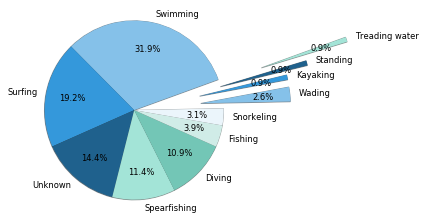

In [56]:
colors = ["#85C1E9", "#3498DB", "#1F618D", "#A3E4D7", "#73C6B6", "#D0ECE7", "#EBF5FB"]
plt.pie(new_dataframe['Total Deaths'], labels = new_dataframe['Activity'],colors=colors, explode=(0, 0, 0, 0,0,0,0,6,6,8,12),
shadow=True,startangle=20,pctdistance=0.7,labeldistance=1.1,textprops={'size': 'smaller'},radius=8, autopct='%1.1f%%')
plt.axis('scaled')
plt.show()

#### Gráfico que muestra el número de muertes por actividad.

#### Una de mis hipótesis estaba relacionada con los países con mayor número de muertes por ataque de tiburones. En principio voy a ver el número de ataques y comprobar si fueron mortales o no.

In [57]:
sharkAttack['Country'].value_counts()

USA                 1670
AUSTRALIA            677
SOUTH AFRICA         422
NEW ZEALAND           62
PAPUA NEW GUINEA      48
MEXICO                38
BAHAMAS               37
MOZAMBIQUE            29
NEW CALEDONIA         28
EGYPT                 13
VIETNAM                8
HONG KONG              7
JAPAN                  6
SOLOMON ISLANDS        2
Name: Country, dtype: int64

In [58]:
attackCountry = mortalAttack[['Fatal (Y/N)','Year', 'Country', 'Activity']]
attackCountry.head()

,Fatal (Y/N),Year,Country,Activity
52,Y,2016,AUSTRALIA,Diving
56,Y,2016,AUSTRALIA,Surfing
208,Y,2015,USA,Snorkeling
227,Y,2015,AUSTRALIA,Surfing
242,Y,2014,AUSTRALIA,Spearfishing


In [59]:
attackCountry['Country'].value_counts() 

#Al parecer se han producido más ataques en USA pero el número de muertes es mayor en Astralia

AUSTRALIA           66
USA                 59
SOUTH AFRICA        59
MEXICO              13
PAPUA NEW GUINEA    12
MOZAMBIQUE           7
NEW CALEDONIA        6
NEW ZEALAND          4
EGYPT                2
BAHAMAS              1
Name: Country, dtype: int64

#### Ahora podemos ver el número de muertes por ataques de tiburones y la actividad que se estaba realizando en cada país.

In [60]:
tableCountry = pd.crosstab(attackCountry.Country, attackCountry.Activity, margins=True, margins_name="Total")
tableCountry.head()

Activity,Diving,Fishing,Kayaking,Snorkeling,Spearfishing,Standing,Surfing,Swimming,Treading water,Unknown,Wading,Total
Country,,,,,,,,,,,,
AUSTRALIA,9,1,0,2,8,1,17,17,0,10,1,66
BAHAMAS,0,0,0,0,1,0,0,0,0,0,0,1
EGYPT,0,1,0,1,0,0,0,0,0,0,0,2
MEXICO,1,0,0,0,0,0,2,7,0,0,3,13
MOZAMBIQUE,0,0,0,0,2,0,0,5,0,0,0,7


In [61]:
dataPlot = tableCountry[['Diving','Fishing','Kayaking','Snorkeling','Spearfishing','Standing','Surfing','Swimming','Treading water','Unknown','Wading']]

#Creo un dataframe nuevo porque no quiero que el gráfico me incluya la columna de Total ya que se repiten datos.

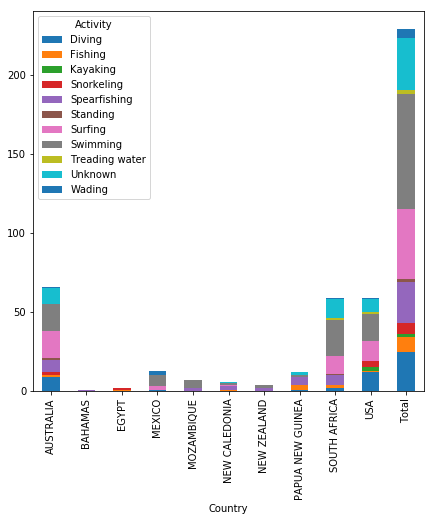

In [62]:
dataPlot.plot(kind="bar", figsize=(7,7), stacked=True)

#### Con este gráfico se puede ver que en Australia las actividades más asociadas a muerte por ataque de tiburones son 'Surfing'y 'Swimming'. En USA es donde más pesa tiene, por ejemplo, 'Wading'.

## Conclusiones

```
- El país donde más gente ha muerto por tiburones no es Estados Unidos, sino Australia.

- El número de muertes por ataque de tiburones es mayor en los casos 'Unprovoked' por lo que la actividad o la injerencia humana tiene menos peso que otras circunstancias.

- La actividad más relacionada con la muerte por ataque de tiburones no es el surf como tal, sino 'Swimming', aunque 'Surfing' sería la que le sigue.

```

## Mejoras del análisis

- He limpiados algunos datos que después no he utilizado para el análisis, por lo que quizá eso sería algo a mejorar en futuros análisis. 

- Como he comentado también, en el caso de las actividades hay un porcentaje relevante de 'Unknown' por lo que sería interesante darle otra vuelta para intentar clasificar mejor esta categoría.

- Aunque no ha sido posible por las característas del proyecto, podría ser interesante cruzar los datos de las especies de tiburones con los niveles de población de cada especie (si están en peligro de extinción, desde cuándo etc.)